In [1]:
import numpy as np
from scipy.special import iv
import timeit
import viscid 
import imp
from scipy.linalg import eig
import matplotlib.pyplot as plt
import json

In [2]:
args=viscid.args
argsdict=dict(args.__dict__)

### Dispersion relation for the inviscid problem in Sec. III. The notes Sec. IV describe continuation to the viscid problem starting from the inviscid dispersion, but I haven't been able to do that yet. Instead, below, I continue starting from the instability boundary described in Sec. V, starting with a flat substrate and changing As and ad in turn.

In [10]:
argsdict['dim']=2
viscid.indices, viscid.rows, viscid.cols=viscid.makeindices(argsdict)

In [13]:
num=50

start=timeit.default_timer()
kxs1=np.arange(1,num+1)/num*argsdict['k1x']/2
kys1=np.arange(1,num+1)/num*0

evalssweep1=[]
for i in range(num):
    argsdict['kx']=kxs1[i]
    argsdict['ky']=kys1[i]
    F,G=viscid.inviscid_mat(argsdict)
    Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)))
    Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)))
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep1=evalssweep1+[evals]
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
kxs2=argsdict['k1x']/2+np.arange(1,num)/num*((2*argsdict['k1x'] + argsdict['k2x'])/3 - argsdict['k1x']/2)
kys2=argsdict['k1y']/2+np.arange(1,num)/num*((2*argsdict['k1y'] + argsdict['k2y'])/3 - argsdict['k1y']/2)
evalssweep2=[]
for i in range(num-1):
    argsdict['kx']=kxs2[i]
    argsdict['ky']=kys2[i]
    F,G=viscid.inviscid_mat(argsdict)
    Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)))
    Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)))
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep2=evalssweep2+[evals]
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
kxs3=np.arange(1,num)/num*((2*argsdict['k1x'] + argsdict['k2x'])/3)
kys3=np.arange(1,num)/num*((2*argsdict['k1y'] + argsdict['k2y'])/3)
evalssweep3=[]
for i in range(num-1):
    argsdict['kx']=kxs3[i]
    argsdict['ky']=kys3[i]
    F,G=viscid.inviscid_mat(argsdict)
    Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)))
    Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)))
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep3=evalssweep3+[evals]
stop=timeit.default_timer()
print(stop-start)

0.7337961650000011
0.7150406530000168
0.7192079699999567


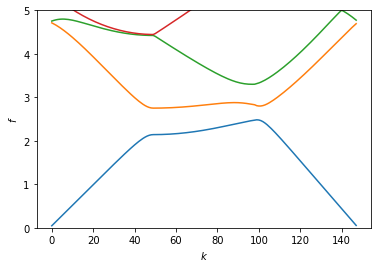

In [14]:
vals1=np.sort(np.abs(np.imag(np.array(evalssweep1)**0.5/(2*np.pi))),axis=1)
vals2=np.sort(np.abs(np.imag(np.array(evalssweep2)**0.5/(2*np.pi))),axis=1)
vals3=np.flip(np.sort(np.abs(np.imag(np.array(evalssweep3)**0.5/(2*np.pi))),axis=1),axis=0)

plt.ylim(0,5)
plt.plot(np.concatenate([vals1,vals2,vals3]))
plt.xlabel('$k$')
plt.ylabel('$f$')           
plt.show()

0.1442349420000255


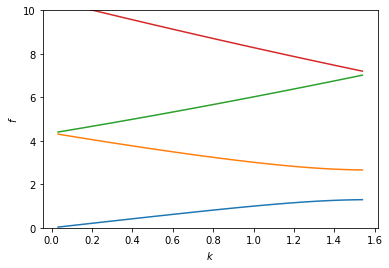

In [17]:
num=50

start=timeit.default_timer()
argsdict['k1x']=np.pi
argsdict['mu']=0.005
argsdict['sigma']=20
argsdict['h0']=0.1
argsdict['As']=0.09
argsdict['dim']=1
viscid.indices, viscid.rows, viscid.cols=viscid.makeindices(argsdict)


ks=np.arange(1,num)/num*argsdict['k1x']/2
evalssweep1=[]
for k in ks:
    argsdict['kx']=k
    F,G=viscid.inviscid_mat(argsdict)
    Fflattened=F[0,0]
    Gflattened=G[0,0]
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep1=evalssweep1+[evals]
stop=timeit.default_timer()
print(stop-start)
vals1=np.sort(np.abs(np.imag(np.array(evalssweep1)**0.5))/(2*np.pi),axis=1)

plt.ylim(0,10)
plt.plot(ks,vals1)
plt.xlabel('$k$')
plt.ylabel('$f$')           
plt.show()

### Plot Floquet exponent sweeps

As 0 0.07 ad 0 0.8 kx 1.41 0.25


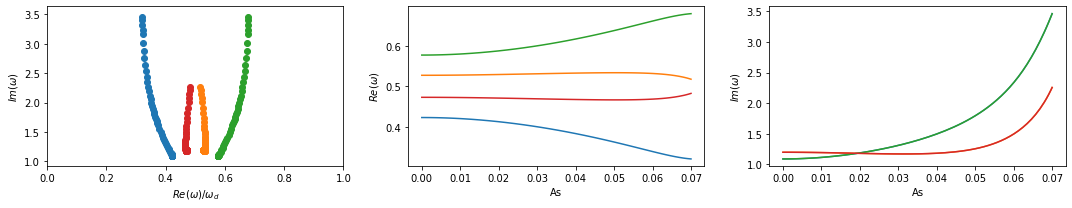

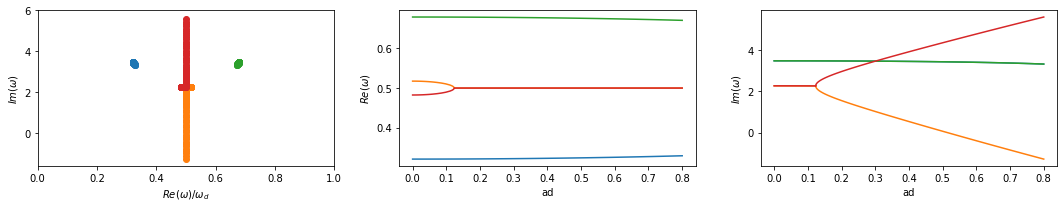

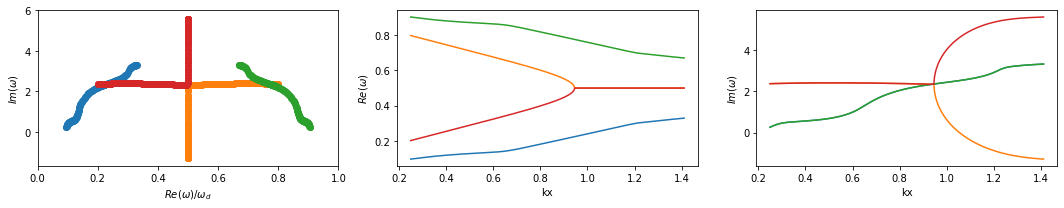

In [3]:
filebase='data/newtest'
argsdict=json.load(open(filebase+'argsdict.json'))
viscid.indices, viscid.rows, viscid.cols=viscid.makeindices(argsdict)
print(argsdict['sweeps'])
for sweep in range(len(argsdict['sweeps'].split(' '))//3):

    plt.subplots(1,3,figsize=(15,3))
    plt.subplot(1,3,1)

    evals=np.load(filebase+'_'+str(sweep)+'_'+'evals.npy')
    vs,ws=np.load(filebase+'_'+str(sweep)+'_'+'evecs.npy')
    pars=np.load(filebase+'_'+str(sweep)+'_'+'pars.npy')

    for i in range(evals.shape[0]):
        plt.scatter(np.mod(np.real(evals[i]),(argsdict['freq']*2*np.pi))/(argsdict['freq']*2*np.pi),np.imag(evals[i]))

    plt.xlim(0,1)
    plt.xlabel('$Re(\omega)/\omega_d$')
    plt.ylabel('$Im(\omega)$')

    plt.subplot(1,3,2)
    for i in range(evals.shape[0]):
        plt.plot(pars,np.mod(np.real(evals[i]),(argsdict['freq']*2*np.pi))/(argsdict['freq']*2*np.pi))
    plt.xlabel(argsdict['sweeps'].split(' ')[3*sweep])
    plt.ylabel('$Re(\omega)$')

    plt.subplot(1,3,3)
    for i in range(evals.shape[0]):
        plt.plot(pars,np.imag(evals[i]))
    plt.xlabel(argsdict['sweeps'].split(' ')[3*sweep])
    plt.ylabel('$Im(\omega)$')
    plt.tight_layout()
    plt.savefig(filebase+'_'+str(sweep)+'.pdf')
    plt.show()

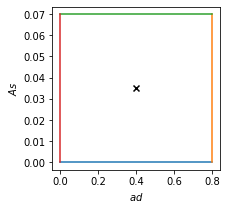

In [11]:
plt.figure(figsize=(3,3))
plt.plot([0,0.8],[0,0.0])
plt.plot([0.8,0.8],[0,0.07])
plt.plot([0.8,0],[0.07,0.07])
plt.plot([0,0],[0.07,0])
plt.scatter([0.4],[0.035],marker='x',c='black')
plt.xlabel('$ad$')
plt.ylabel('$As$')
plt.savefig('loop.pdf')

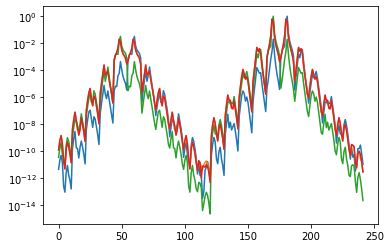

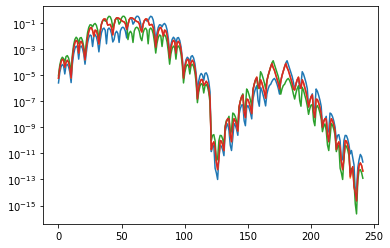

In [15]:
sweep=0
ind=-1
evals=np.load(filebase+'_'+str(sweep)+'_'+'evals.npy')
vs,ws=np.load(filebase+'_'+str(sweep)+'_'+'evecs.npy')
pars=np.load(filebase+'_'+str(sweep)+'_'+'pars.npy')
for v in vs[:,ind]:
    plt.plot(np.abs(v))
plt.yscale('log')
plt.show()
for w in ws[:,ind]:
    plt.plot(np.abs(w))
plt.yscale('log')
plt.show()

try refining the grid after continuing...

In [41]:
filebase='data/newtest'
argsdict=json.load(open(filebase+'argsdict.json'))
viscid.indices, viscid.rows, viscid.cols=viscid.makeindices(argsdict)
print(argsdict['sweeps'])
for sweep in range(len(argsdict['sweeps'].split(' '))//3):
    evals=np.load(filebase+'_'+str(sweep)+'_'+'evals.npy')
    vs,ws=np.load(filebase+'_'+str(sweep)+'_'+'evecs.npy')
    pars=np.load(filebase+'_'+str(sweep)+'_'+'pars.npy')
    
Nx=7
Nt=7
ind=-1
dNx=Nx-argsdict['Nx']
dNt=Nt-argsdict['Nt']

omegas2=[]
vs2=[]
ws2=[]
for i in range(len(evals)):
    omega=evals[i,ind]
    v=vs[i,ind]
    w=ws[i,ind]
    v0=np.zeros((2,2*Nt+1,2*Nx+1),dtype=np.complex128)
    w0=np.zeros((2,2*Nt+1,2*Nx+1),dtype=np.complex128)
    v0[:,dNt:2*Nt+1-dNt,dNx:2*Nx+1-dNx]=v.reshape(2,2*argsdict['Nt']+1,2*argsdict['Nx']+1)
    w0[:,dNt:2*Nt+1-dNt,dNx:2*Nx+1-dNx]=w.reshape(2,2*argsdict['Nt']+1,2*argsdict['Nx']+1)
    argsdict2=argsdict.copy()
    argsdict2['Nx']=Nx
    argsdict2['Nt']=Nt
    argsdict2[argsdict['par']]=pars[ind]
    viscid.indices, viscid.rows, viscid.cols=viscid.makeindices(argsdict2)
    omegans,vns,wns=viscid.rayleigh_mat(omega,v0.ravel(),w0.ravel(),viscid.viscid_mat1d,argsdict2)
    omegas2=omegas2+[[omegans[-1]]]
    vs2=vs2+[[vns[-1]]]
    ws2=ws2+[[wns[-1]]]
print(omegas2)

As 0 0.07 ad 0 0.8 kx 1.41 0.25
[[(3.850053708411434+0.40266016378277686j)], [(24.96191801049435+2.3838798422286476j)], [(27.5658728314579+0.4026601601338865j)], [(6.454008525424941+2.383879842512629j)]]


In [38]:
filebase='data/newtest2'
argsdict=json.load(open(filebase+'argsdict.json'))
viscid.indices, viscid.rows, viscid.cols=viscid.makeindices(argsdict)
print(argsdict['sweeps'])
for sweep in range(len(argsdict['sweeps'].split(' '))//3):
    evals=np.load(filebase+'_'+str(sweep)+'_'+'evals.npy')
    vs,ws=np.load(filebase+'_'+str(sweep)+'_'+'evecs.npy')
    pars=np.load(filebase+'_'+str(sweep)+'_'+'pars.npy')

As 0 0.07 ad 0 0.8 kx 1.41 0.25


In [39]:
omegas3=np.concatenate([omegas2,evals[[0,2],-1][:,np.newaxis]])
vs3=np.concatenate([vs2,vs[[0,2],-1][:,np.newaxis]])
ws3=np.concatenate([ws2,ws[[0,2],-1][:,np.newaxis]])

In [40]:
filebase='data/newtest_refine'
argsdict2['filebase']=filebase
argsdict2['sweeps']=''
np.save(filebase+'_0_evals',omegas3)
np.save(filebase+'_0_evecs',[vs3,ws3])
jdump=json.dumps(argsdict2)
f=open(argsdict2['filebase']+'argsdict.json','w')
f.write(jdump)
f.close()

### Eigenvalues of solutions

In [16]:
colors=plt.rcParams['axes.prop_cycle'].by_key()['color']
from scipy.linalg import svd, eig

argsdict=json.load(open(filebase+'argsdict.json'))
viscid.indices, viscid.rows, viscid.cols = viscid.makeindices(argsdict)
mat=viscid.viscid_mat1d

for sweep in range(len(argsdict['sweeps'].split(' '))//3):
    par=argsdict['sweeps'].split(' ')[3*sweep]
    argsdict[par]=float(argsdict['sweeps'].split(' ')[3*sweep+1])

step_eigs=[]
eigs=[]
for sweep in range(len(argsdict['sweeps'].split(' '))//3):
    par=argsdict['sweeps'].split(' ')[3*sweep]
    evals=np.load(filebase+'_'+str(sweep)+'_'+'evals.npy')
    vs, ws=np.load(filebase+'_'+str(sweep)+'_'+'evecs.npy')
    pars=np.load(filebase+'_'+str(sweep)+'_'+'pars.npy')
    print('\n',par, pars[0], argsdict[par], pars[-1])
    
    steps=[]
    jacs=[]
    for j in range(len(pars)):
        argsdict[par]=pars[j]
        
        step=[]
        jac=[]
        for i in range(len(evals)):
            omega=evals[i,j]
            v=vs[i,j]
            ind=np.ravel_multi_index([0,argsdict['Nt'],argsdict['Nx']],(2,(2*argsdict['Nt']+1),(2*argsdict['Nx']+1)))
            v=v*np.exp(1j*-np.angle(v[ind]))
            E_n=mat(omega,argsdict)
            dE=(mat(omega+argsdict['domega_fd'],argsdict)-E_n)/argsdict['domega_fd']
            F=np.real(E_n).toarray()
            G=np.imag(E_n).toarray()
            x=np.real(v).reshape((1,v.shape[0]))
            y=np.imag(v).reshape((1,v.shape[0]))
            f=np.real(dE.dot(v))[:,np.newaxis]
            g=np.imag(dE.dot(v))[:,np.newaxis]
            zeros=np.zeros(F.shape[1]).reshape((1,v.shape[0]))
            delta=np.zeros(F.shape[1]).reshape((1,v.shape[0]))
            delta[0,ind]=1
            print(sweep, i, j, len(pars), end='\r')

            J0=np.concatenate([F, -G, f, -g],axis=1)
            J1=np.concatenate([G,F,g,f],axis=1)
            J2=np.concatenate([2*x, 2*y, np.array(0).reshape((1,1)),np.array(0).reshape((1,1))],axis=1)
            J3=np.concatenate([zeros,delta,np.array(0).reshape((1,1)), np.array(0).reshape((1,1))],axis=1)
            J=np.concatenate([J0,J1,J2,J3],axis=0)
            step_evals,step_evecs=eig(J)
            
            step=step+[step_evals]
        steps=steps+[step]
    step_eigs=step_eigs+[steps]



 ad 0.123 0.123 0.1235000000000005


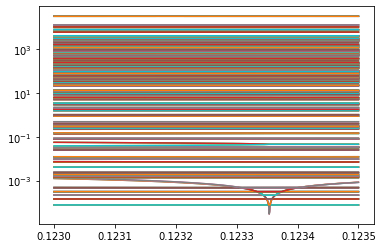

In [18]:
mx=1e-3
sweep=0
inds=[1,3]

esweep=np.array(step_eigs[sweep])
vals=esweep[:,inds,:]
pars=np.load(filebase+'_'+str(sweep)+'_'+'pars.npy')

for m in range(len(inds)):
    for ev in np.sort(np.abs(vals)[:,m],axis=1).T:
        plt.plot(pars,ev)
        plt.yscale('log')

plt.show()


(-0.001, 0.001)

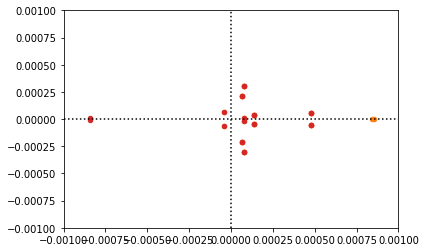

In [19]:
n=-1
mx=1e-3

for m in range(len(inds)):
    plt.scatter(np.real(vals[n,m]), np.imag(vals[n,m]),s=20,c=colors[inds[m]])
plt.plot([-mx, mx], [0,0],ls=':',c='black')
plt.plot([0,0],[-mx, mx],ls=':',c='black')
plt.xlim(-mx,mx)
plt.ylim(-mx,mx)

In [20]:
mx=1e-3

for n in range(len(pars)):
    print(pars[n],end='\r')
    fig=plt.figure()
    for m in range(len(inds)):
        plt.scatter(np.real(vals[n,m]), np.imag(vals[n,m]),s=20,c=colors[inds[m]])
    plt.plot([-mx, mx], [0,0],ls=':',c='black')
    plt.plot([0,0],[-mx, mx],ls=':',c='black')
    plt.xlim(-mx,mx)
    plt.ylim(-mx,mx)
    plt.xlabel('$Re(\lambda)$')
    plt.ylabel('$Im(\lambda)$')
    plt.title(r'$a_d=%f$'%(pars[n]))
    plt.savefig('animation/%04d'%(n))
    plt.close()


### Pseudospectra

In [9]:
from scipy.linalg import svd
filebase='data/newtest_refine_cont_cont'
argsdict=json.load(open(filebase+'argsdict.json'))
viscid.indices, viscid.rows, viscid.cols = viscid.makeindices(argsdict)

sweep=1
evals=np.load(filebase+'_'+str(sweep)+'_'+'evals.npy')
pars=np.load(filebase+'_'+str(sweep)+'_'+'pars.npy')
vs,ws=np.load(filebase+'_'+str(sweep)+'_'+'evecs.npy')

index=-1
ind=5
argsdict['As']=pars[index]
E=viscid.viscid_mat1d(evals[ind,index],argsdict)
U,s,V=svd(E.todense())
print(np.log(np.sum(1/s**2)**0.5))
print(np.linalg.norm(E.dot(vs[ind,index])),np.linalg.norm(E.T.dot(ws[ind,index])))

-82.82874539806284
9.785651497236463e+41 1.044709841431926e+44


In [53]:
sweep=1
evals=np.load(filebase+'_'+str(sweep)+'_'+'evals.npy')
pars=np.load(filebase+'_'+str(sweep)+'_'+'pars.npy')
vs,ws=np.load(filebase+'_'+str(sweep)+'_'+'evecs.npy')

index=-1
argsdict['kx']=1.41
argsdict['ad']=pars[index]

num=51
norms=[]
Xs=[]
Ys=[]
start=timeit.default_timer()
# for ind in range(len(evals)):
for ind in range(len(evals)):
    omegars = np.real(evals[ind,index])+np.linspace(-0.1,0.1,num)*argsdict['freq']*2*np.pi
    omegais = np.imag(evals[ind,index])*(1+np.linspace(-0.1,0.1,num))
    omegas=[]
    norm=[]
    for omegar in omegars:
        print(ind, '%.3f'%((omegar-omegars[0])/(omegars[-1]-omegars[0])),end='\r')
        for omegai in omegais:
            E=viscid.viscid_mat1d(omegar+1j*omegai,argsdict)
            U,s,V=svd(E.todense())
            norm=norm+[np.sum(1/s**2)**0.5]
            omegas=omegas+[omegar+1j*omegai]
    
    X=np.zeros((num,num))
    Y=np.zeros((num,num))
    X=omegars
    Y=omegais
    Y=Y.T
    norms=norms+[np.log(np.array(norm).reshape((num,num))).T]
    Xs=Xs+[X]
    Ys=Ys+[Y]
stop=timeit.default_timer()
print(stop-start)

1478.775997019


In [90]:
np.save('data/norms',norms)
np.save('data/Xs',Xs)
np.save('data/Ys',Ys)

In [7]:
norms=np.load('data/norms.npy')
Xs=np.load('data/Xs.npy')
Ys=np.load('data/Ys.npy')

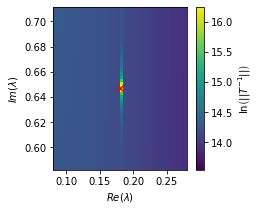

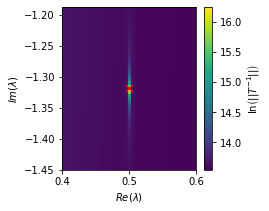

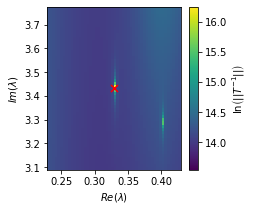

In [12]:
for ind in [0,1,4]:
    plt.figure(figsize=(3,3))
    plt.pcolormesh(Xs[ind]/(2*np.pi*argsdict['freq']), Ys[ind], norms[ind], vmin=np.min(norms),vmax=1.2*np.min(norms))
    plt.colorbar(label=r'$\ln\left( || T^{-1} || \right)$')
    plt.scatter(np.real(evals)[ind,index]/(2*np.pi*argsdict['freq']), np.imag(evals)[ind,index],s=50,marker='x',c='r')
    plt.xlabel('$Re(\lambda)$')
    plt.ylabel('$Im(\lambda)$')
    plt.savefig(filebase+'_'+str(ind)+'_ps.pdf')
    plt.show()
